In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.dates as mdates
from scipy.stats import linregress
#from api_keys import nas_api_key
from functools import reduce
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num
from decimal import Decimal

In [5]:
meta = pd.read_csv('data/Facebook.csv',index_col='Date',parse_dates=True)
amzn = pd.read_csv('data/Amazon.csv',index_col='Date',parse_dates=True)
aapl = pd.read_csv('data/Apple.csv',index_col='Date',parse_dates=True)
nflx = pd.read_csv('data/Netflix.csv',index_col='Date',parse_dates=True)
goog = pd.read_csv('data/Google.csv',index_col='Date',parse_dates=True)

In [6]:
facebook_SP = meta.iloc[44:294, :]
amazon_SP = amzn.iloc[44:294, :]
apple_SP = aapl.iloc[44:294, :]
netflix_SP = nflx.iloc[44:294, :]
google_SP = goog.iloc[44:294, :]
facebook_SP.head(10)

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-12-29,$120.26,22366190,$116.40,$121.03,$115.77
2022-12-28,$115.62,19612470,$116.25,$118.15,$115.51
2022-12-27,$116.88,21392310,$117.93,$118.60,$116.05
2022-12-23,$118.04,17796630,$116.03,$118.18,$115.54
2022-12-22,$117.12,23618120,$117.20,$118.62,$114.38
2022-12-21,$119.76,20392800,$116.70,$120.34,$115.62
2022-12-20,$117.09,28742500,$113.26,$117.33,$112.46
2022-12-19,$114.48,29769880,$116.83,$117.80,$114.33
2022-12-16,$119.43,67064000,$120.23,$123.31,$118.82


In [7]:
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('$','').replace(',',''))
    return(x)

In [8]:
cb_amzn = amazon_SP['Close/Last']
cb_amzn = amazon_SP['Close/Last'].apply(clean_currency).astype('float')
print(cb_amzn)



Date
2022-12-29     84.18
2022-12-28     81.82
2022-12-27     83.04
2022-12-23     85.25
2022-12-22     83.79
               ...  
2022-01-07    162.55
2022-01-06    163.25
2022-01-05    164.36
2022-01-04    167.52
2022-01-03    170.40
Name: Close/Last, Length: 250, dtype: float64


In [9]:
# cb_amzn = amazon_SP['Close/Last'].sort_values()
# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
# ytick_loc = [0, 50, 100, 150, 200, 249]
# ax.set_yticks(ytick_loc)

# plt.title("Time vs. Stock Price")
# plt.xlabel("Market Days 2022")
# plt.ylabel("Last Close Stock Price Amazon ($)")
# #plt.yticks([0,50,100,150,200,249])
# plt.plot(cb_amzn)
# plt.savefig('output/amzn_tvsp.png')
# plt.show()

In [10]:
#facebook_SP.head(10)
fb_volume = facebook_SP['Volume']
am_volume = amazon_SP['Volume']
ap_volume = apple_SP['Volume']
nx_volume = netflix_SP['Volume']
gl_volume = google_SP['Volume']

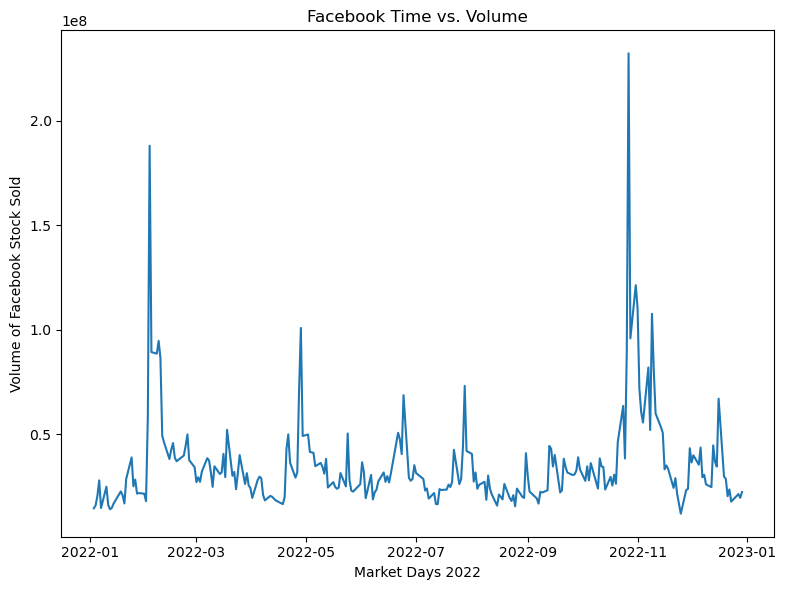

In [31]:

# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
# ytick_loc = [0, 50, 100, 150, 200, 249]
# ax.set_yticks(ytick_loc)

plt.title("Facebook Time vs. Volume")
plt.xlabel("Market Days 2022")
plt.ylabel("Volume of Facebook Stock Sold")
#plt.yticks([0,50,100,150,200,249])
plt.plot(fb_volume)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

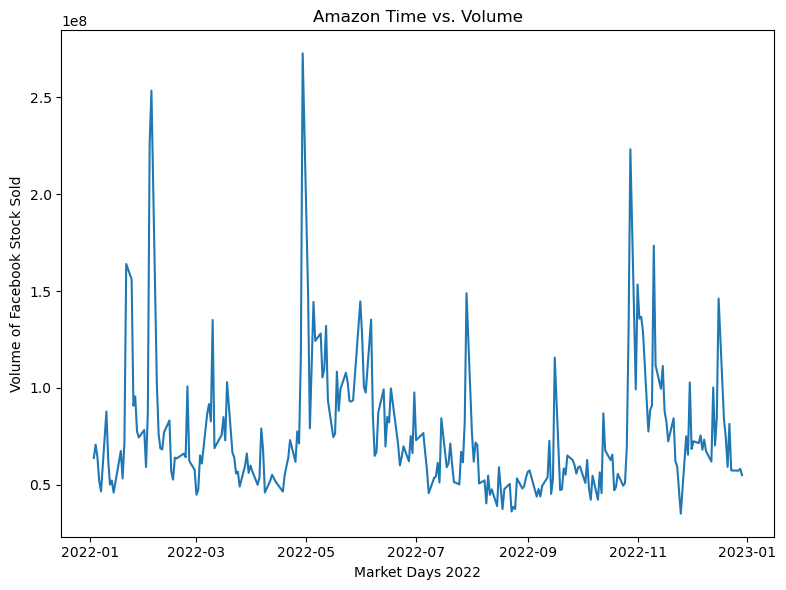

In [33]:

# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
# ytick_loc = [0, 50, 100, 150, 200, 249]
# ax.set_yticks(ytick_loc)

plt.title("Amazon Time vs. Volume")
plt.xlabel("Market Days 2022")
plt.ylabel("Volume of Facebook Stock Sold")
#plt.yticks([0,50,100,150,200,249])
plt.plot(am_volume)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

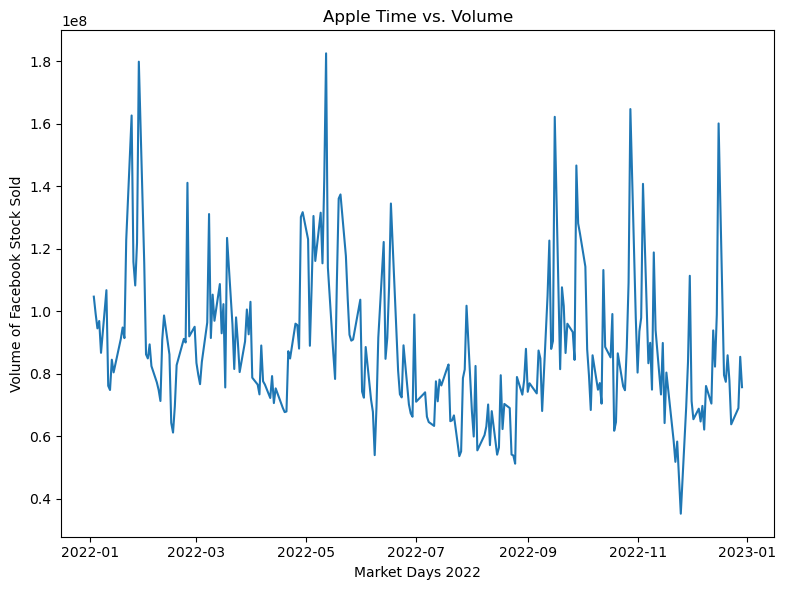

In [32]:

# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
# ytick_loc = [0, 50, 100, 150, 200, 249]
# ax.set_yticks(ytick_loc)

plt.title("Apple Time vs. Volume")
plt.xlabel("Market Days 2022")
plt.ylabel("Volume of Facebook Stock Sold")
#plt.yticks([0,50,100,150,200,249])
plt.plot(ap_volume)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

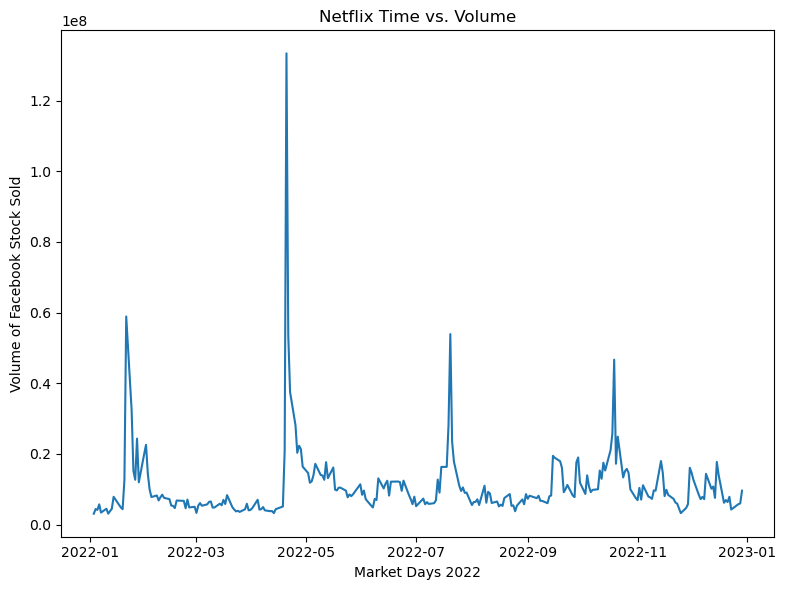

In [34]:

# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
# ytick_loc = [0, 50, 100, 150, 200, 249]
# ax.set_yticks(ytick_loc)

plt.title("Netflix Time vs. Volume")
plt.xlabel("Market Days 2022")
plt.ylabel("Volume of Facebook Stock Sold")
#plt.yticks([0,50,100,150,200,249])
plt.plot(nx_volume)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

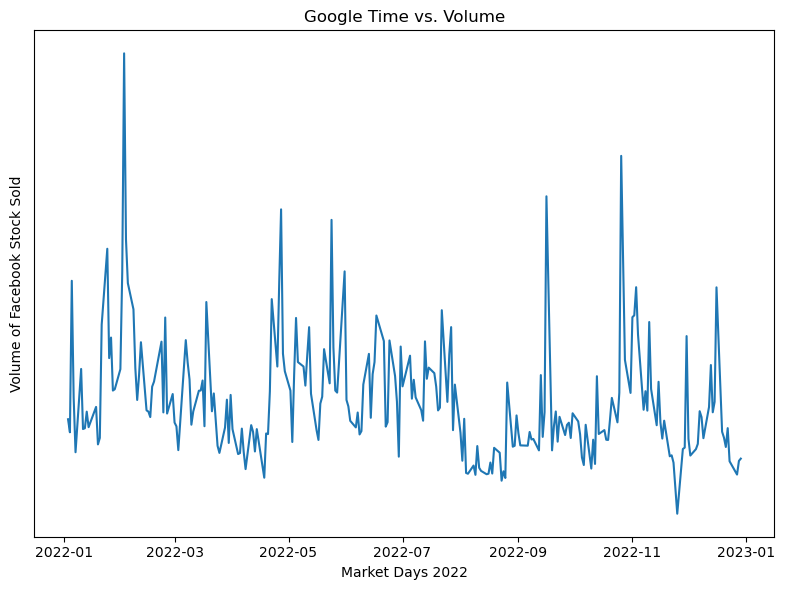

In [35]:

# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
# ytick_loc = [0, 50, 100, 150, 200, 249]
# ax.set_yticks(ytick_loc)

plt.title("Google Time vs. Volume")
plt.xlabel("Market Days 2022")
plt.ylabel("Volume of Facebook Stock Sold")
plt.yticks([0,50,100,150,200,249])
plt.plot(gl_volume)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

In [20]:
# import data files
facebookDataPath = "data/Facebook.csv"
amazonDataPath = "data/Amazon.csv"
appleDataPath = "data/Apple.csv"
netflixDataPath = "data/Netflix.csv"
googleDataPath = "data/Google.csv"

# read and display the data
facebook_csv = pd.read_csv(facebookDataPath)
amazon_csv = pd.read_csv(amazonDataPath)
apple_csv = pd.read_csv(appleDataPath)
netflix_csv = pd.read_csv(netflixDataPath)
google_csv = pd.read_csv(googleDataPath)

In [21]:
facebook_SP = facebook_csv.iloc[44:294, :]
amazon_SP = amazon_csv.iloc[44:294, :]
apple_SP = apple_csv.iloc[44:294, :]
netflix_SP = netflix_csv.iloc[44:294, :]
google_SP = google_csv.iloc[44:294, :]
facebook_SP.head(10)

,Date,Close/Last,Volume,Open,High,Low
44,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
45,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
46,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
47,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
48,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38
49,12/21/22,$119.76,20392800,$116.70,$120.34,$115.62
50,12/20/22,$117.09,28742500,$113.26,$117.33,$112.46
51,12/19/22,$114.48,29769880,$116.83,$117.80,$114.33
52,12/16/22,$119.43,67064000,$120.23,$123.31,$118.82
53,12/15/22,$116.15,34530970,$118.33,$118.63,$114.01


In [22]:
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('$','').replace(',',''))
    return(x)

In [23]:
cb_amzn = amazon_SP['Close/Last']
cb_amzn = amazon_SP['Close/Last'].apply(clean_currency).astype('float')
print(cb_amzn)

44      84.18
45      81.82
46      83.04
47      85.25
48      83.79
        ...  
289    162.55
290    163.25
291    164.36
292    167.52
293    170.40
Name: Close/Last, Length: 250, dtype: float64


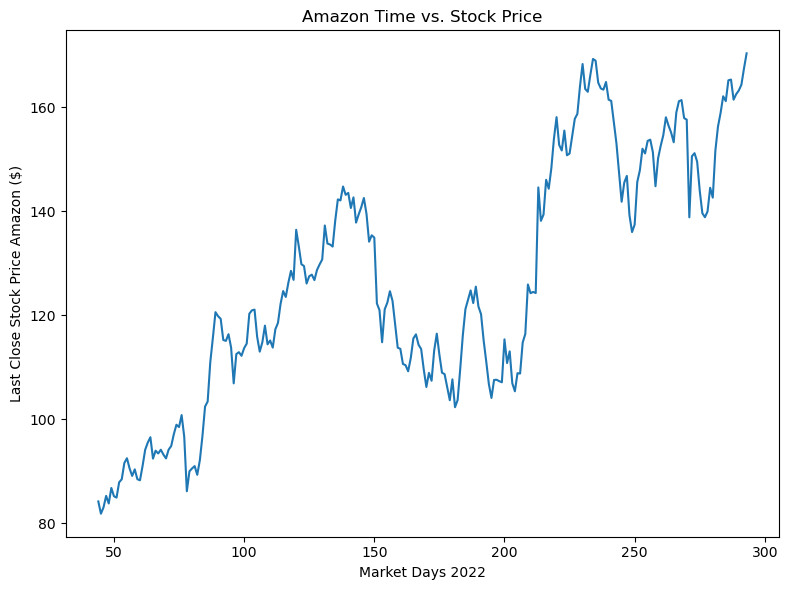

In [44]:
#cb_close = amazon_SP['Close/Last']
# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True
# fig, ax = plt.subplots()
#ytick_loc = [0, 50, 100, 150, 200, 249]
#ax.set_yticks(ytick_loc)
#cb_date = amazon_SP['Date']

#year_price = plt.plot(cb_date, cb_close, color="blue", label="Price" )

plt.title("Amazon Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_amzn)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

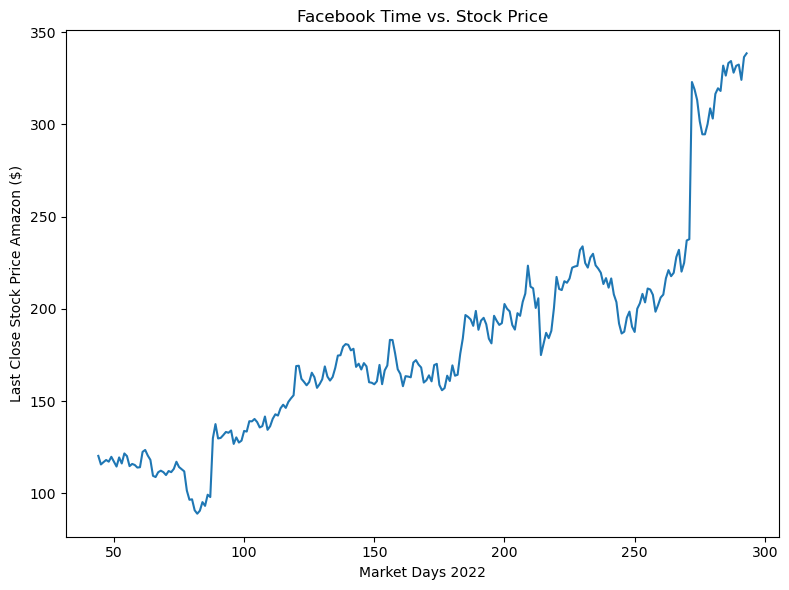

In [45]:
cb_fb = facebook_SP['Close/Last']
cb_fb = facebook_SP['Close/Last'].apply(clean_currency).astype('float')
#print(cb_amzn)
plt.title("Facebook Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_fb)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

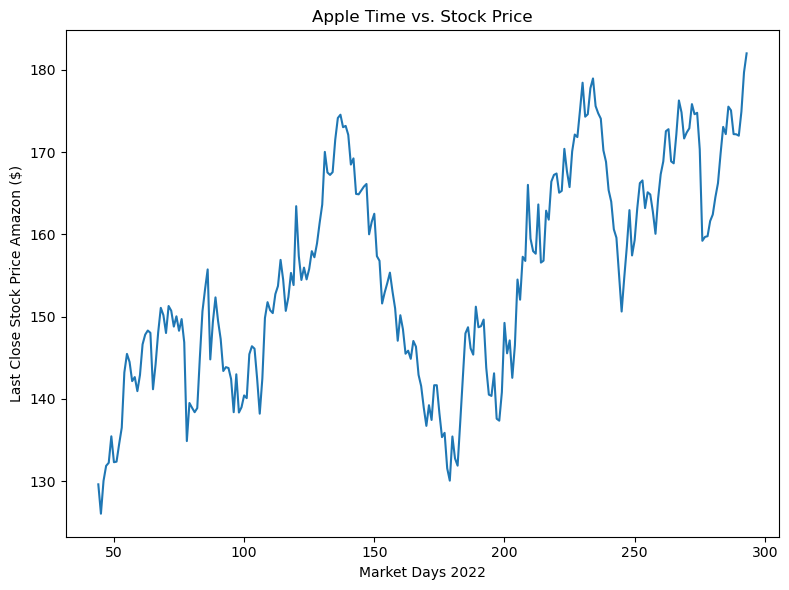

In [46]:
cb_ap = apple_SP['Close/Last']
cb_ap = apple_SP['Close/Last'].apply(clean_currency).astype('float')
#print(cb_amzn)
plt.title("Apple Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_ap)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

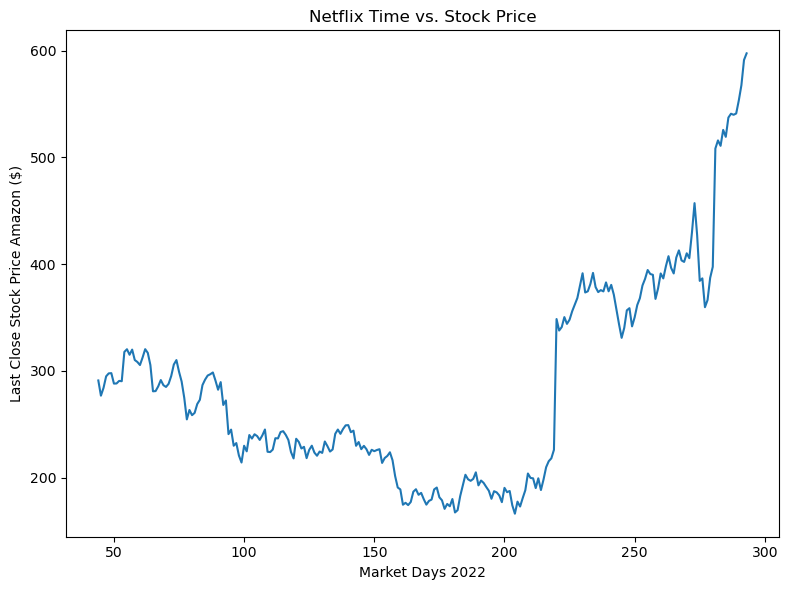

In [47]:
cb_nx = netflix_SP['Close/Last']
cb_nx = netflix_SP['Close/Last'].apply(clean_currency).astype('float')
#print(cb_amzn)
plt.title("Netflix Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_nx)
#plt.savefig('output/amzn_tvsp.png')
plt.show()

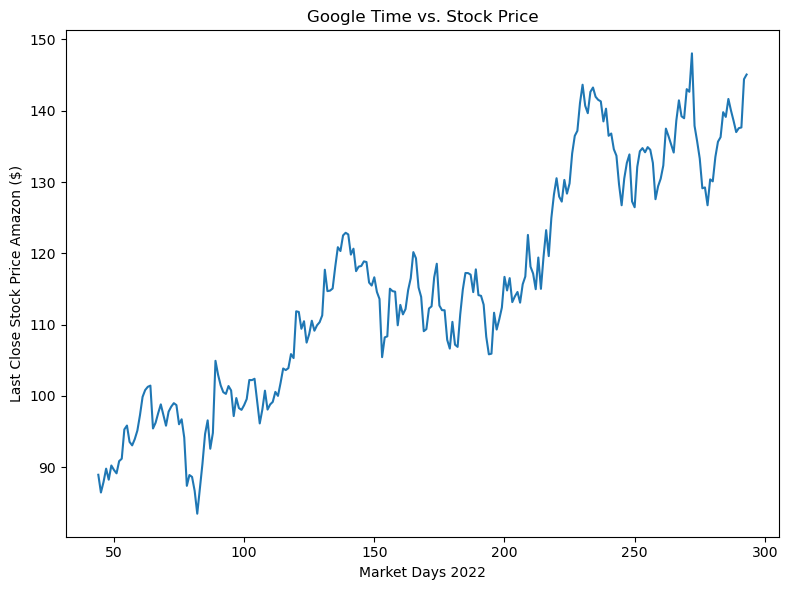

In [48]:
cb_gg = google_SP['Close/Last']
cb_gg = google_SP['Close/Last'].apply(clean_currency).astype('float')
#print(cb_amzn)
plt.title("Google Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_gg)
#plt.savefig('output/amzn_tvsp.png')
plt.show()